In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score, classification_report

/tmp/ipykernel_8682/2252245981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-26 22:41:24.821165: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 22:41:25.340942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 22:41:25.341064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin 

In [2]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print('Shape of Diabetes dataset is :',dataframe.shape)
print('Size of Diabetes dataset is  :',dataframe.size)

Shape of Diabetes dataset is : (768, 9)
Size of Diabetes dataset is  : 6912


In [4]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Drop if there are duplicates rows.
dataframe = dataframe.drop_duplicates()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# show how many columns has 0 values and sum it

featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [8]:
# Replacing 0 values with mean or median of that column
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())#normal distribution
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())#normal distribution
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())#skewed distribution
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].median())#skewed distribution
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].median())#skewed distribution

In [9]:
# Now verify whether there are any 0 values
featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


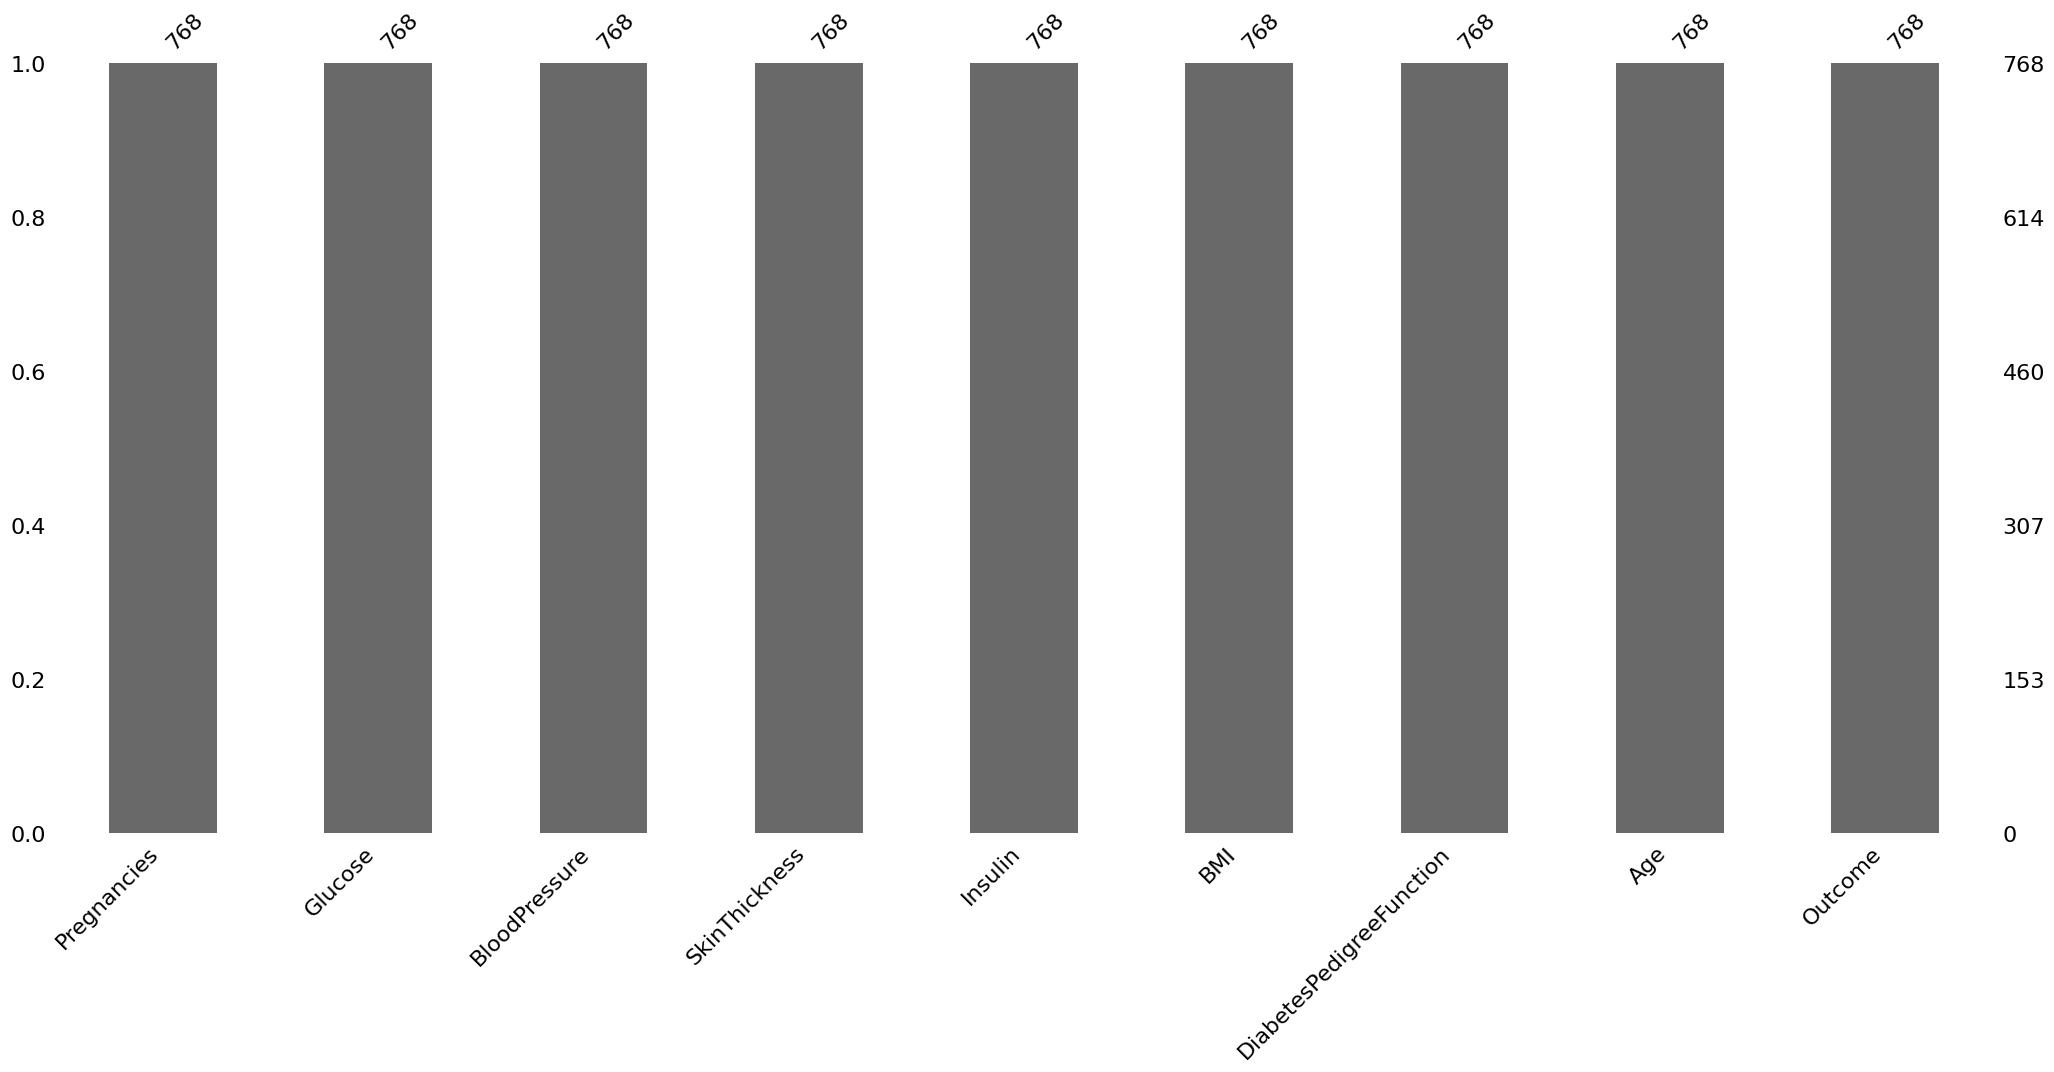

In [10]:
# check for Null values 
import missingno as msno
msno.bar(dataframe)
plt.show()

In [11]:
# replacing the value 0 and 1 in column name Outcome for readability
dataframe["Outcome"].replace(0,"Non-Diabetic",inplace=True) 
dataframe["Outcome"].replace(1,"Diabetic",inplace=True)
dataframe["Outcome"]

0          Diabetic
1      Non-Diabetic
2          Diabetic
3      Non-Diabetic
4          Diabetic
           ...     
763    Non-Diabetic
764    Non-Diabetic
765    Non-Diabetic
766        Diabetic
767    Non-Diabetic
Name: Outcome, Length: 768, dtype: object

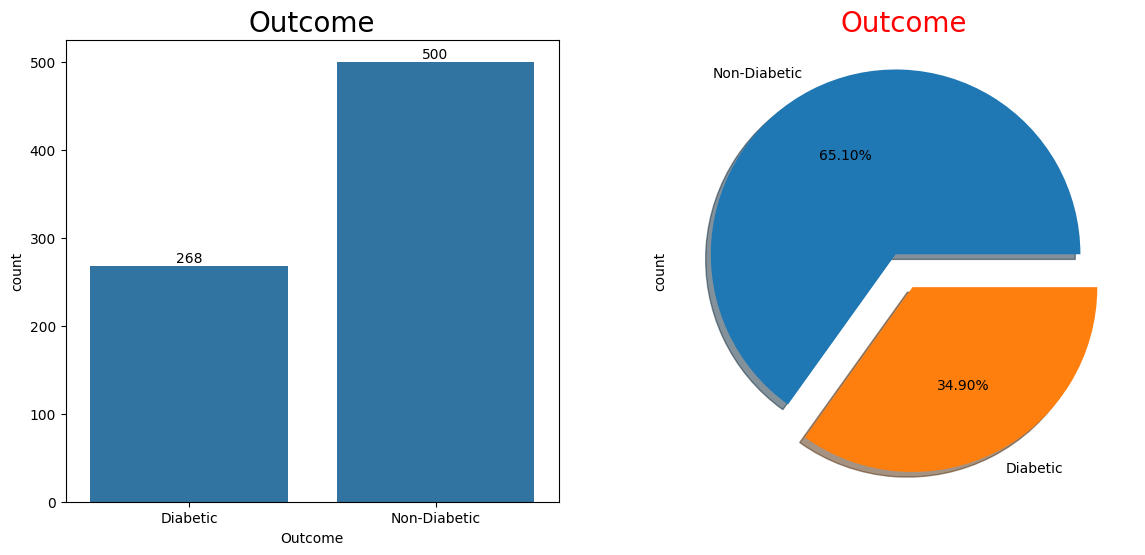

In [12]:
# plot the no of patients 
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outcome', data=dataframe)
ax.bar_label(ax.containers[0])
plt.title("Outcome", fontsize=20)

ax =plt.subplot(1,2,2)
ax=dataframe['Outcome'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outcome", fontsize = 20,color='Red');

In [13]:
# for my analysis purpose i am saving the diabetic and non-diabetic data in different variables.
Diabetic = dataframe[dataframe["Outcome"]=="Diabetic"]
Non_diabetic = dataframe[dataframe["Outcome"]=="Non-Diabetic"]
Diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,Diabetic
2,8,183.0,64.0,23,30.5,23.3,0.672,32,Diabetic
4,0,137.0,40.0,35,168.0,43.1,2.288,33,Diabetic
6,3,78.0,50.0,32,88.0,31.0,0.248,26,Diabetic
8,2,197.0,70.0,45,543.0,30.5,0.158,53,Diabetic


In [14]:
Diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,142.159661,74.950326,29.716418,116.041045,35.381343,0.550500,37.067164
std,3.741239,29.545943,12.016572,9.676886,127.689084,6.596704,0.372354,10.968254
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000
25%,1.750000,119.000000,68.000000,23.000000,30.500000,30.900000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,30.500000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [15]:
x1=len(dataframe[dataframe["Glucose"]<=140])
x2=len(dataframe[(dataframe["Glucose"]>140)&(dataframe["Glucose"]<=199)])
x3=len(dataframe[dataframe["Glucose"]>=200])
print("patient count having normal Blood sugar :",x1)
print("patient count having prediabetes :",x2)
print("patient count having abnormal glucose :",x3)

patient count having normal Blood sugar : 576
patient count having prediabetes : 192
patient count having abnormal glucose : 0


In [16]:
### saving the patient details whose Glucose level is normal and are diabetic in a dataframe.
a=dataframe[(dataframe["Glucose"]<=140)&(dataframe["Outcome"]=="Diabetic")]
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.000000,35,168.0,43.1,2.288,33,Diabetic
6,3,78.0,50.000000,32,88.0,31.0,0.248,26,Diabetic
9,8,125.0,96.000000,23,30.5,32.0,0.232,54,Diabetic
15,7,100.0,69.105469,23,30.5,30.0,0.484,32,Diabetic
16,0,118.0,84.000000,47,230.0,45.8,0.551,31,Diabetic
...,...,...,...,...,...,...,...,...,...
743,9,140.0,94.000000,23,30.5,32.7,0.734,45,Diabetic
750,4,136.0,70.000000,23,30.5,31.2,1.182,22,Diabetic
755,1,128.0,88.000000,39,110.0,36.5,1.057,37,Diabetic
757,0,123.0,72.000000,23,30.5,36.3,0.258,52,Diabetic


In [17]:
z=dataframe[(dataframe["Age"]>=35) & (dataframe["BMI"]>=30)& (dataframe["Outcome"]=="Diabetic")]
z[z["Pregnancies"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
66,0,109.0,88.0,30,30.5,32.5,0.855,38,Diabetic
440,0,189.0,104.0,25,30.5,34.3,0.435,41,Diabetic
506,0,180.0,90.0,26,90.0,36.5,0.314,35,Diabetic
757,0,123.0,72.0,23,30.5,36.3,0.258,52,Diabetic


In [18]:
dataframe = dataframe.replace({'Outcome': {'Non-Diabetic': 0, 'Diabetic': 1}})
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


In [19]:
# Feature Selection
df_selected=dataframe.copy(deep=True)

In [20]:
# Handling Outliers
# Quantile Transformer 

x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age', 'Outcome']
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


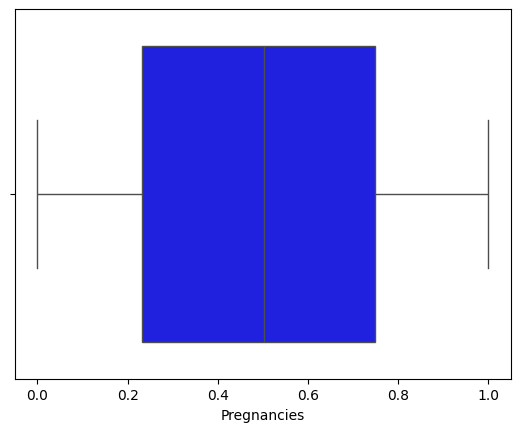

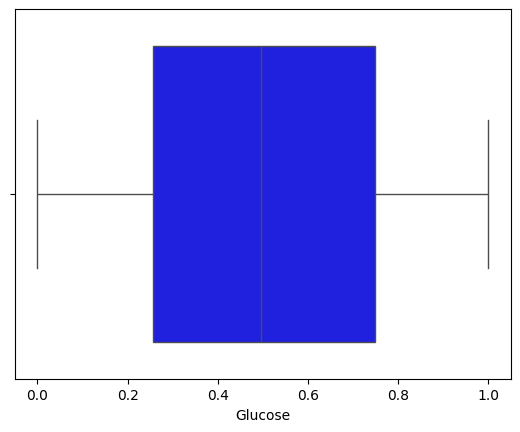

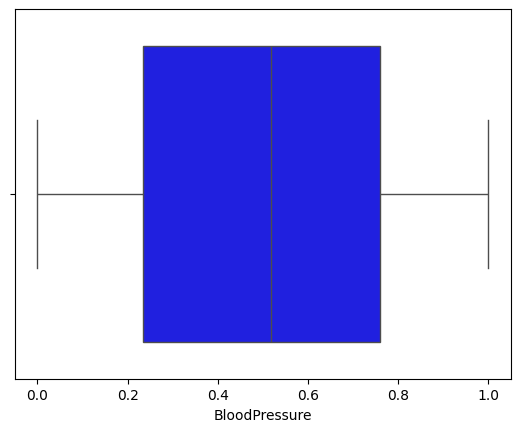

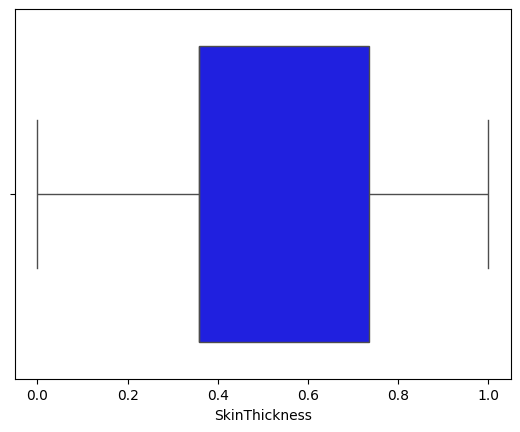

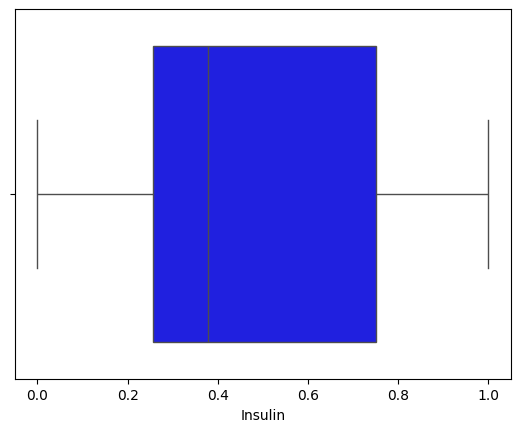

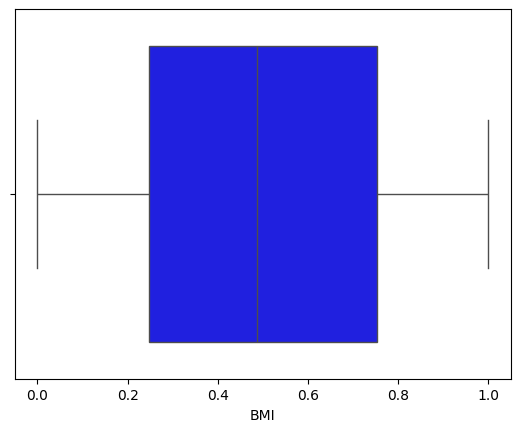

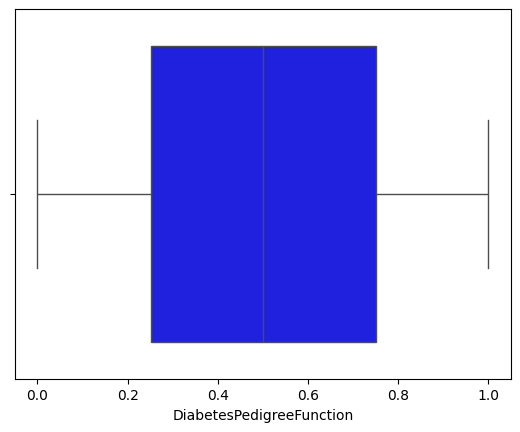

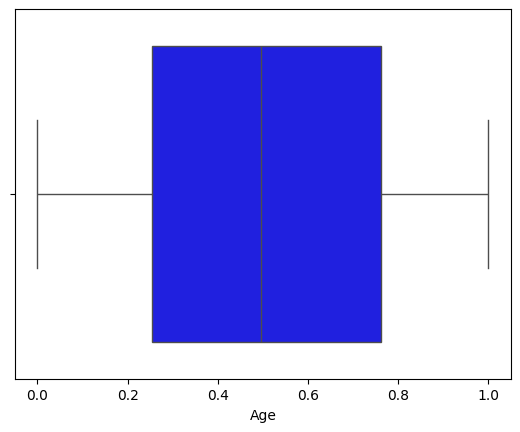

In [21]:
# verify if the outliers are present or not.
x = df_new.drop(['Outcome'],axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'blue')
    plt.xlabel(i)
    plt.show()

In [22]:
X = df_new.drop(columns='Outcome', axis=1)
Y = df_new['Outcome']
X.head() # independent features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258


In [2]:
# Train And Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=12) # Splitting in the ratio of 60% for train, 40% for test.


KeyboardInterrupt



## Logestic Regression

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred_lr = logic.predict(X_test)

log_train = round(logic.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 75.98 %
Model Accuracy Score : 77.92 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       147
         1.0       0.73      0.63      0.68        84

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231

--------------------------------------------------------


In [25]:
# Define your logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with epochs
model.fit(X_train, y_train, epochs=100)

# Predict on test data
y_pred_lr = model.predict(X_test)

# Convert probabilities to binary labels based on threshold
y_pred_lr_binary = (y_pred_lr > 0.5).astype(int)


# Evaluate the model
log_train = model.evaluate(X_train, y_train)[1] * 100
log_accuracy = accuracy_score(y_test, y_pred_lr_binary) * 100

print("Training Accuracy    :", log_train ,"%")
print("Model Accuracy Score :", log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_lr_binary))
print("\033[1m--------------------------------------------------------\033[0m")
print("Training Accuracy    :", log_train ,"%")
print("Model Accuracy Score :", log_accuracy ,"%")

Epoch 1/100
17/17 [==============================] - 1s 3ms/step - loss: 0.8758 - accuracy: 0.3613
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8339 - accuracy: 0.3780
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8005 - accuracy: 0.4097
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.4320
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7521 - accuracy: 0.4507
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7352 - accuracy: 0.4600
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.4804
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7113 - accuracy: 0.4972
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7026 - accuracy: 0.5084
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5158
Epoch 11/

## Support Vector

In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

Training Accuracy    : 81.56 %
Model Accuracy Score : 77.06 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       147
         1.0       0.71      0.62      0.66        84

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



## Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 71.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       147
         1.0       0.59      0.64      0.62        84

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231

--------------------------------------------------------


## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 85.85 %
Model Accuracy Score : 73.16 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       147
         1.0       0.65      0.56      0.60        84

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231

--------------------------------------------------------


## Random Forest

Training Accuracy    : 100.0 %
Model Accuracy Score : 77.49 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       147
         1.0       0.75      0.57      0.65        84

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

--------------------------------------------------------


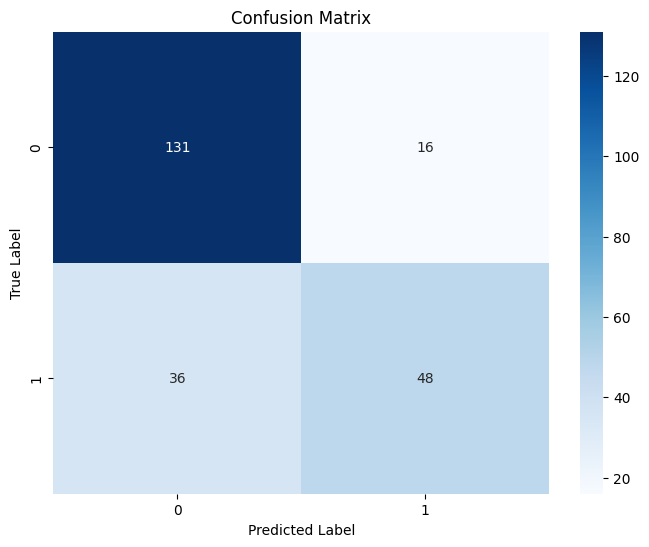

In [29]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred_dec = random.predict(X_test)

random_train = round(random.score(X_train, y_train) * 100, 2)
random_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",random_train ,"%")
print("Model Accuracy Score :",random_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Plotting confusion matrix with title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# preprocessing

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing pipeline for numerical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])  # You can replace RandomForestClassifier with any other classifier

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

NameError: name 'StandardScaler' is not defined

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Preprocessing pipeline for numerical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))  # Using PCA to reduce dimensions to 3 principal components
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])  # You can replace RandomForestClassifier with any other classifier

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


: 

## Soft Voting

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train And Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3,random_state=12) # Splitting in the ratio of 60% for train, 40% for test.

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=12)
gb_classifier = GradientBoostingClassifier(random_state=12)
lr_classifier = LogisticRegression(random_state=12)
svm_classifier = SVC(probability=True, random_state=12)

# Train classifiers
rf_classifier.fit(X_train_scaled, y_train)
gb_classifier.fit(X_train_scaled, y_train)
lr_classifier.fit(X_train_scaled, y_train)
svm_classifier.fit(X_train_scaled, y_train)

# Predict probabilities for each classifier
rf_probs = rf_classifier.predict_proba(X_test_scaled)
gb_probs = gb_classifier.predict_proba(X_test_scaled)
lr_probs = lr_classifier.predict_proba(X_test_scaled)
svm_probs = svm_classifier.predict_proba(X_test_scaled)

# Weighted average of predicted probabilities
ensemble_probs = (rf_probs + gb_probs + lr_probs + svm_probs) / 4

# Convert probabilities to binary labels
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_preds)
print("Accuracy:", accuracy)

# Evaluate the model

print("\nClassification Report:\n", classification_report(y_test, ensemble_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ensemble_preds))



: 

In [ ]:
# Define the number of epochs
num_epochs = 1


# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=12)
gb_classifier = GradientBoostingClassifier(random_state=12)
lr_classifier = LogisticRegression(random_state=12)
svm_classifier = SVC(probability=True, random_state=12)

# Iterate through epochs
for epoch in range(num_epochs):
    # Train classifiers
    rf_classifier.fit(X_train_scaled, y_train)
    gb_classifier.fit(X_train_scaled, y_train)
    lr_classifier.fit(X_train_scaled, y_train)
    svm_classifier.fit(X_train_scaled, y_train)

# Predict probabilities for each classifier
rf_probs = rf_classifier.predict_proba(X_test_scaled)
gb_probs = gb_classifier.predict_proba(X_test_scaled)
lr_probs = lr_classifier.predict_proba(X_test_scaled)
svm_probs = svm_classifier.predict_proba(X_test_scaled)

# Weighted average of predicted probabilities
ensemble_probs = (rf_probs + gb_probs + lr_probs + svm_probs) / 4

# Convert probabilities to binary labels
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_preds)
print("Accuracy:", accuracy)


: 

## CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Training the CART model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = cart_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

: 


## Comparing Different Models

In [ ]:
# Create a variable 
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Decission Tree', 'Random Forest'],
                       'Training Accuracy':[svc_train,knn_train,log_train,decision_train, random_train],
                       'Model Accuracy':[svc_accuracy,knn_accuracy,log_accuracy,decision_accuracy, random_accuracy]})

: 

In [ ]:
models.sort_values(by='Model Accuracy', ascending=False)

: 

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

plt.figure(figsize=(9,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Model Accuracy'], palette=colors )
plt.show()

: 

## FINAL PREDICTIONS

In [ ]:
# Make predictions on unseen data, here i have given random values for each features in the input_data
# take the data  and store in the variable 
input_data = (2,80,90,40,150,24,0.727000,20)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data) # converting this list into numpy array

# reshape the numpy array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

: 

In [ ]:
# predict
predictions = logic.predict(input_data_reshaped)
print(predictions)
if predictions[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted to not have diabetes.")
    

: 